In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf

In [2]:
# Load the saved model
model = tf.keras.models.load_model('RSNA_VGG16.h5')

In [3]:
# Path to your test images folder
test_folder = "test_images"

# List all the images in the folder
test_image_paths = os.listdir(test_folder)

In [4]:
test_image_paths

['t1.png', 't2.png', 't3.png', 't4.png']

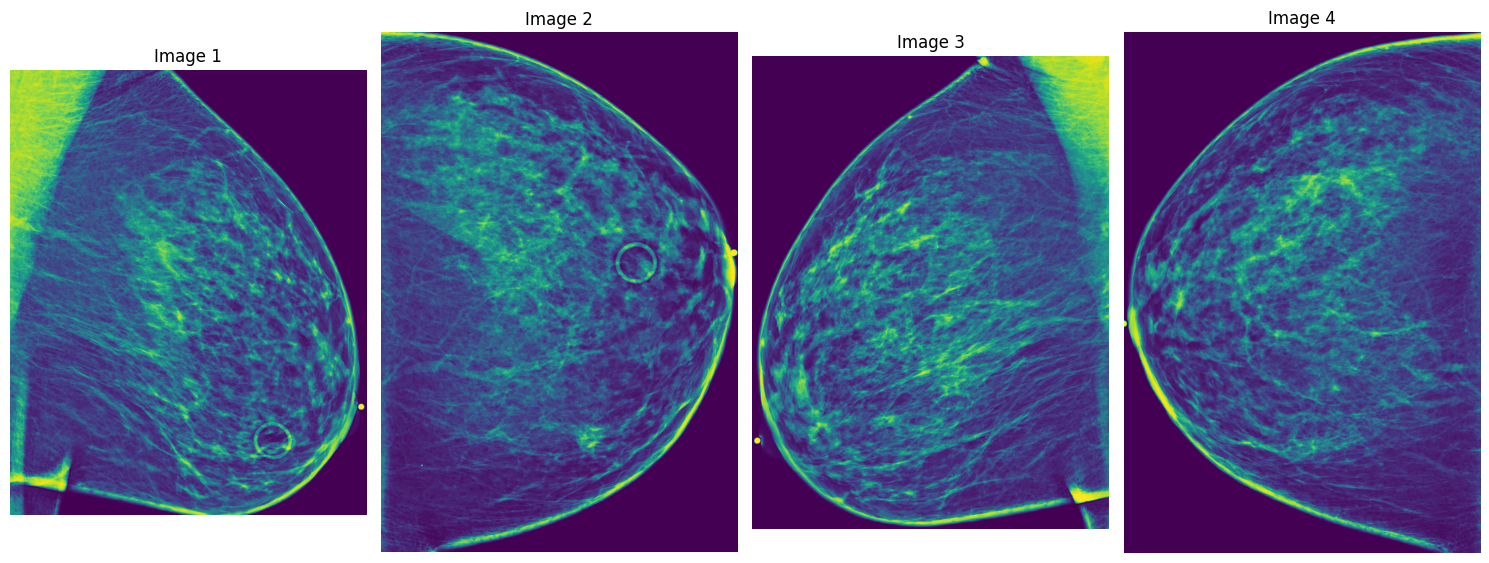

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to your test images folder
test_folder = "test_images"

# List all the images in the folder
test_image_paths = os.listdir(test_folder)

# Set up the figure size and layout
plt.figure(figsize=(15, 10))  # Adjust the size as needed

# Loop through the first N files in the file_list and display them
for i, filename in enumerate(test_image_paths):  # Here, we're showing the first 4 images
    # Full path to the image file
    filepath = os.path.join(test_folder, filename)
    
    # Read the image file
    image = mpimg.imread(filepath)
    
    # Add a subplot for each image
    plt.subplot(1, 4, i + 1)  # Adjust the layout parameters as needed (rows, columns, index)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis('off')  # Turn off axis numbers and ticks

# Show all the images
plt.tight_layout()
plt.show()

In [20]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Ensure this is correctly pointing to your images
test_image_paths = [os.path.join(test_folder, f) for f in os.listdir(test_folder)]

def generate_test_data(test_image_paths):
    # Assuming test_image_paths is already organized as batches of 4 images each representing one patient
    while True:
        batch_images = [[] for _ in range(4)]  # Initialize lists for each of the four image inputs
        for i, img_path in enumerate(test_image_paths):
            img = load_img(img_path, target_size=(224, 224))
            img = img_to_array(img)
            img = preprocess_input(img)
            batch_images[i % 4].append(img)  # Append each image to its respective list

        # Stack images in each list and convert to tensors
        batch_images = [np.stack(images) for images in batch_images]
        batch_images = [tf.convert_to_tensor(images, dtype=tf.float32) for images in batch_images]

        yield tuple(batch_images)  # Yield a tuple of four tensors


In [24]:
# Create a `tf.data.Dataset` from the generator
test_dataset = tf.data.Dataset.from_generator(
    lambda: generate_test_data(test_image_paths),
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)
    )
)

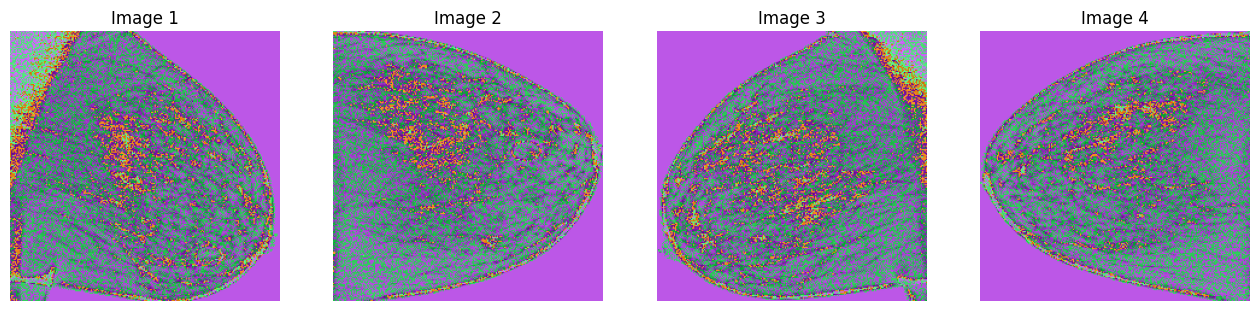

In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to display a single image
def show_image(image, title=""):
    plt.imshow(image.astype("uint8"))
    plt.title(title)
    plt.axis('off')

# Function to visualize one batch of the dataset
def visualize_batch(dataset):
    for batch_images in dataset.take(1):  # Take one batch
        plt.figure(figsize=(16, 4))
        for i in range(4):
            plt.subplot(1, 4, i + 1)
            # Convert tensor to numpy array and scale pixel values back to 0-255
            image = batch_images[i][0].numpy()
            image = ((image + 1) * 127.5).astype(np.uint8)  # Adjust if preprocessing included scaling
            show_image(image, f"Image {i+1}")
        plt.show()

# Assume test_dataset is already created as per previous instructions
visualize_batch(test_dataset)


In [25]:
# Now you can use this `test_dataset` for making predictions
for batch_images in test_dataset.take(1):  # Take one batch for example
    prediction = model.predict(batch_images)
    print("Predictions:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions: [[0.18075803]]
